In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV

import warnings
warnings.filterwarnings("ignore")

In [3]:
#read data in
df = pd.read_csv('happiness.csv' )
df = df.drop(columns = ['Country','Happiness Rank','Lower Confidence Interval', 'Upper Confidence Interval'])

#separate the categorical data to use later
one_hot = pd.get_dummies(df['Region'])

#separate the reponse variable
y = df['Happiness Score']

#remove the categorical and target variables so that only numerical data is left
df = df.drop(columns = ['Happiness Score', 'Region'])
df.head()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


(0, 0.2)

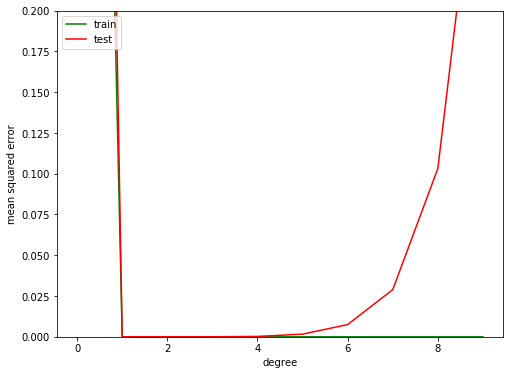

In [6]:
## find what polynomial fits our numerical features best
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3)

degrees = 10

train_error = []
test_error = []

for degree in range(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    train_error.append(mean_squared_error(y_train, model.predict(X_train)))
    test_error.append(mean_squared_error(y_test, model.predict(X_test)))
    
plt.figure(figsize=(8,6))
plt.plot(np.arange(degrees), train_error, color='green', label='train')
plt.plot(np.arange(degrees), test_error, color='red', label='test')
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.ylim(0,.2)

In [11]:
#Let us choose to use a degree 2 polynomial
model = make_pipeline(PolynomialFeatures(2), StandardScaler())
model.fit(df)
pd.DataFrame(model.transform(df)).head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,1.186299,1.392183,1.038507,1.436930,2.772822,0.893092,0.765200,1.346587,1.690259,...,1.756589,3.075481,1.494649,1.724507,3.372193,2.760084,3.351490,0.627389,1.396733,0.718916
1,0.0,1.394308,1.322597,1.335903,1.479400,2.479192,0.286472,0.682387,1.688736,1.832443,...,1.827792,2.822982,0.895380,1.702059,2.808089,1.747534,2.950307,0.025671,0.646907,0.621920
2,0.0,1.149536,1.465607,1.354712,1.346129,0.109558,1.756145,0.935379,1.288167,1.710704,...,1.606886,0.397934,2.296548,1.762991,-0.177634,0.752233,0.388539,1.744539,2.546701,0.923254
3,0.0,1.516148,1.253612,1.041788,1.551931,1.988876,1.022396,0.626918,1.898303,1.889190,...,1.951131,2.388810,1.711210,1.727251,1.961544,2.193670,2.364382,0.775234,1.457275,0.557846
4,0.0,1.099253,1.282725,1.107924,1.379223,2.461213,0.092141,0.925370,1.209261,1.525594,...,1.661049,2.712589,0.644745,1.788242,2.774939,1.496354,3.131308,-0.135053,0.530528,0.911049


In [12]:
#now ready to merge this pretty transformed numerical data back with the categorical data
X = one_hot.join(pd.DataFrame(model.transform(df)))

# apply my regression model
model = RidgeCV(cv=10, alphas = [0.0001,0.1,1])
model.fit(X,y)
model.score(X,y)

0.999999949699253

In [13]:
X.head()

,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe,...,26,27,28,29,30,31,32,33,34,35
0,0,0,0,0,0,0,0,0,0,1,...,1.756589,3.075481,1.494649,1.724507,3.372193,2.760084,3.351490,0.627389,1.396733,0.718916
1,0,0,0,0,0,0,0,0,0,1,...,1.827792,2.822982,0.895380,1.702059,2.808089,1.747534,2.950307,0.025671,0.646907,0.621920
2,0,0,0,0,0,0,0,0,0,1,...,1.606886,0.397934,2.296548,1.762991,-0.177634,0.752233,0.388539,1.744539,2.546701,0.923254
3,0,0,0,0,0,0,0,0,0,1,...,1.951131,2.388810,1.711210,1.727251,1.961544,2.193670,2.364382,0.775234,1.457275,0.557846
4,0,0,0,0,0,0,0,0,0,1,...,1.661049,2.712589,0.644745,1.788242,2.774939,1.496354,3.131308,-0.135053,0.530528,0.911049


In [15]:
len(model.coef_)

46

In [17]:
X.shape

(157, 46)